# Import Library

In [1]:
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import nltk
# nltk.download('all')
from nltk.corpus import stopwords

# Load Dataset

In [2]:
train = pd.read_csv('./dataset/train.csv')
train.head()

,id,text,target
0,0,"\nThey were, and even if Washington might cons...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,\n\n\nNot to worry. The Masons have been demo...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233 entries, 0 to 9232
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9233 non-null   int64 
 1   text    9233 non-null   object
 2   target  9233 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 216.5+ KB


In [4]:
temp = train.target.unique()
np.sort(temp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

# Preprocessing

In [5]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
            
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
        
    return missing_col

missing_col = check_missing_col(train)


결측치가 존재하지 않습니다


In [6]:
qmarks = np.mean(train['text'].apply(lambda x : '?' in x))
fullstop = np.mean(train['text'].apply(lambda x : '.' in x))
capital_first = np.mean(train['text'].apply(lambda x : x[0].isupper()))
capitals = np.mean(train['text'].apply(lambda x : max([y.isupper() for y in x])))
numbers = np.mean(train['text'].apply(lambda x : max([y.isdigit() for y in x])))

print('물음표가 있는 뉴스: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 뉴스: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 뉴스: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 뉴스: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 뉴스: {:.2f}%'.format(numbers * 100))

물음표가 있는 뉴스: 44.59%
마침표가 있는 뉴스: 95.48%
첫 글자가 대문자인 뉴스: 41.19%
대문자가 있는 뉴스: 98.19%
숫자가 있는 뉴스: 58.36%


In [7]:
def clean_text(texts):
    corpus = []
    
    for i in range(0, len(texts)):
        # @%*=()/+ 와 같은 문장부호 제거
        review = re.sub(
            r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '', texts[i])
        review = re.sub(r'\d+', '', review)      # 숫자 제거
        review = review.lower()                  # 소문자 변환
        review = re.sub(r'\s+', ' ', review)     # extra space 제거
        review = re.sub(r'<[^>]+>', '', review)  # Html tags 제거
        review = re.sub(r'\s+', ' ', review)     # spaces 제거
        review = re.sub(r"^\s+", '', review)     # space from start 제거
        review = re.sub(r'\s+$', '', review)     # space from the end 제거
        review = re.sub(r'_', ' ', review)       # space from the end 제거
        corpus.append(review)

    return corpus

In [8]:
temp = clean_text(train['text']) 
train['text'] = temp
train.head()

,id,text,target
0,0,they were and even if washington might conside...,10
1,1,we run spacenews views on our stareach bbs a l...,14
2,2,not to worry the masons have been demonized an...,19
3,3,only brendan mckay or maybe arf would come to ...,17
4,4,help i am running some sample problems from or...,5


## News Group Rate Check

In [9]:
val_count = train['target'].value_counts()

for i in range(20):
    print(f'라벨 {i}인 리뷰 갯수 : {val_count[i]}')

라벨 0인 리뷰 갯수 : 386
라벨 1인 리뷰 갯수 : 480
라벨 2인 리뷰 갯수 : 458
라벨 3인 리뷰 갯수 : 467
라벨 4인 리뷰 갯수 : 490
라벨 5인 리뷰 갯수 : 496
라벨 6인 리뷰 갯수 : 494
라벨 7인 리뷰 갯수 : 493
라벨 8인 리뷰 갯수 : 475
라벨 9인 리뷰 갯수 : 490
라벨 10인 리뷰 갯수 : 482
라벨 11인 리뷰 갯수 : 488
라벨 12인 리뷰 갯수 : 483
라벨 13인 리뷰 갯수 : 490
라벨 14인 리뷰 갯수 : 467
라벨 15인 리뷰 갯수 : 515
라벨 16인 리뷰 갯수 : 428
라벨 17인 리뷰 갯수 : 455
라벨 18인 리뷰 갯수 : 387
라벨 19인 리뷰 갯수 : 309


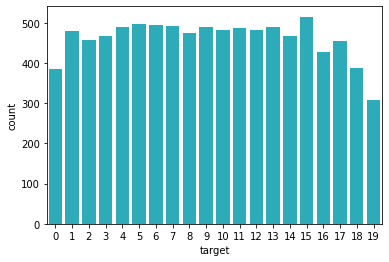

<Figure size 720x504 with 0 Axes>

In [10]:
sns.countplot(x='target', data=train, color='#17becf')

plt.figure(figsize=(10, 7))
plt.show()

---

## Text Length Check

In [11]:
train_length = train['text'].apply(len)

print(f'뉴스 길이 최댓값 : {round(np.max(train_length), 0)}')
print(f'뉴스 길이 최솟값 : {round(np.min(train_length), 0)}')
print(f'뉴스 길이 평균값 : {round(np.mean(train_length), 0)}')
print(f'뉴스 길이 중간값 : {round(np.median(train_length), 0)}')
print(f'뉴스 길이 표준편차 : {round(np.std(train_length), 0)}')

뉴스 길이 최댓값 : 71331
뉴스 길이 최솟값 : 0
뉴스 길이 평균값 : 1020.0
뉴스 길이 중간값 : 444.0
뉴스 길이 표준편차 : 2892.0


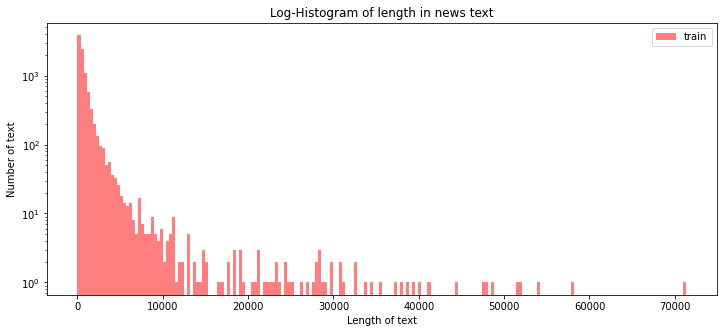

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, facecolor='r', label='train')
plt.title('Log-Histogram of length in news text')
plt.yscale('log')
plt.legend()

plt.xlabel('Length of text', fontsize=10)
plt.ylabel('Number of text', fontsize=10)
plt.show()

**뉴스의 길이가 대부분 1,000 안팎인데 길이가 1,000 이상인 데이터도 많이 분포돼 있는 것을 확인할 수 있다.**

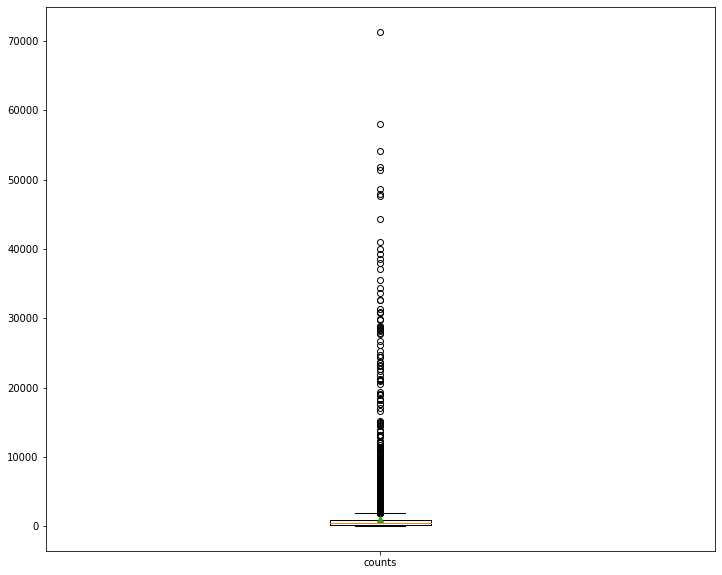

In [13]:
plt.figure(figsize=(12, 10))

plt.boxplot(train_length,
            labels=['counts'],
            showmeans=True)
plt.show()

---

## Text Count Check

In [14]:
train_word_counts = train['text'].apply(lambda x : len(x.split(' ')))

print(f'뉴스 단어 갯수 최댓값 : {round(np.max(train_word_counts), 0)}')
print(f'뉴스 단어 갯수 최솟값 : {round(np.min(train_word_counts), 0)}')
print(f'뉴스 단어 갯수 평균값 : {round(np.mean(train_word_counts), 0)}')
print(f'뉴스 단어 갯수 중간값 : {round(np.median(train_word_counts), 0)}')
print(f'뉴스 단어 갯수 표준편차 : {round(np.std(train_word_counts), 0)}')

뉴스 단어 갯수 최댓값 : 9771
뉴스 단어 갯수 최솟값 : 1
뉴스 단어 갯수 평균값 : 167.0
뉴스 단어 갯수 중간값 : 77.0
뉴스 단어 갯수 표준편차 : 440.0


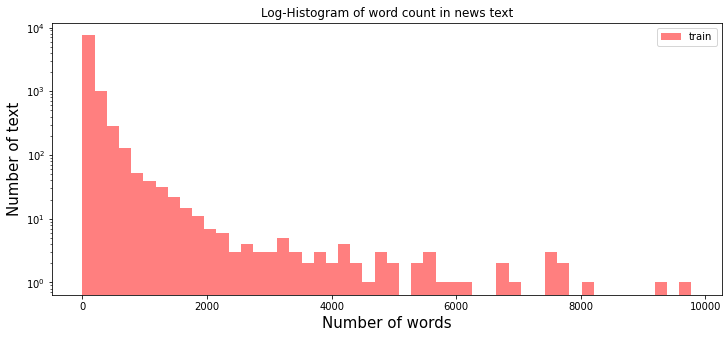

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, alpha=0.5, facecolor='r', label='train')
plt.title('Log-Histogram of word count in news text')
plt.yscale('log')
plt.legend()

plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of text', fontsize=15)
plt.show()

---

## Stopwords

In [16]:
def text_preprocessing(news_text, remove_stopwords=False):
    words = news_text.split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        clean_words = ' '.join(words)
    else:
        clean_words = ' '.join(words)
    return clean_words

In [17]:
test_text = train['text'][500]
print(f'기존 문장 : {train["text"][500]}\n')
print(f'불용어를 적용한 문장 : {text_preprocessing(test_text, remove_stopwords=True)}')

기존 문장 : dont be so sure look what happened to japanese citizens in the us duringworld war ii if youre prepared to say lets round these people up andstick them in a concentration camp without trial its only a short step togassing them without trial after all it seems that the nazis originallyonly intended to imprison the jews the final solution was dreamt up partlybecause they couldnt afford to run the camps because of the devastationcaused by goerings total war those who werent gassed generally died ofmalnutrition or disease

불용어를 적용한 문장 : dont sure look happened japanese citizens us duringworld war ii youre prepared say lets round people andstick concentration camp without trial short step togassing without trial seems nazis originallyonly intended imprison jews final solution dreamt partlybecause couldnt afford run camps devastationcaused goerings total war werent gassed generally died ofmalnutrition disease


### Apply all train dataset stopwords

In [18]:
clean_news_text = []

for news in train['text']:
    clean_news_text.append(text_preprocessing(news, remove_stopwords=True))

clean_news_text[500]

'dont sure look happened japanese citizens us duringworld war ii youre prepared say lets round people andstick concentration camp without trial short step togassing without trial seems nazis originallyonly intended imprison jews final solution dreamt partlybecause couldnt afford run camps devastationcaused goerings total war werent gassed generally died ofmalnutrition disease'

---

# Modeling

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
clean_train_df = pd.DataFrame({'clean_text': clean_news_text, 'text': train['text'], 'target': train['target']})

In [21]:
clean_train_df.head()

,clean_text,text,target
0,even washington might consider patty bust id r...,they were and even if washington might conside...,10
1,run spacenews views stareach bbs localoperatio...,we run spacenews views on our stareach bbs a l...,14
2,worry masons demonized harrassed almost every ...,not to worry the masons have been demonized an...,19
3,brendan mckay maybe arf would come rescue nazi...,only brendan mckay or maybe arf would come to ...,17
4,help running sample problems oreilly volume xt...,help i am running some sample problems from or...,5


---

## Logistic Regression

In [22]:
news_text = list(clean_train_df['clean_text'])
news_target = list(clean_train_df['target'])

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)

X = vectorizer.fit_transform(news_text)

In [24]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(news_target)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [25]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(solver='liblinear', C = 5, class_weight='balanced')
lgs.fit(X_train, y_train)

LogisticRegression(C=5, class_weight='balanced', solver='liblinear')

In [26]:
print(f"accuracy: {lgs.score(X_eval, y_eval)}")

accuracy: 0.6870600974553329


---

## Linear Support Vector Classifier

In [27]:
news_text = list(clean_train_df['clean_text'])
news_target = list(clean_train_df['target'])

In [28]:
X = np.array(news_text)
y = np.array(news_target)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

---

In [29]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=0.0, 
                              analyzer='word',
                              stop_words='english', 
                              sublinear_tf=True, 
                              ngram_range=(1, 2))),
    ('svc', LinearSVC(class_weight='balanced', 
                      random_state=42))
])

In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=0.0, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('svc', LinearSVC(class_weight='balanced', random_state=42))])

In [31]:
print(f"accuracy: {clf.score(X_eval, y_eval)}")

accuracy: 0.7271250676773146


---

## Multi-layer Perceptron Classifier

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

mlp = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1,
                              analyzer='word',
                              sublinear_tf=True,
                              ngram_range=(1, 2),
                              stop_words='english')),
    ('mlp', MLPClassifier(solver='adam',
                          batch_size=64,
                           early_stopping=True,
                          random_state=42))
])

mlp.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                                 sublinear_tf=True)),
                ('mlp',
                 MLPClassifier(batch_size=64, early_stopping=True,
                               random_state=42))])

In [33]:
print(f"accuracy: {mlp.score(X_eval, y_eval)}")

accuracy: 0.7325392528424473


---

# Submit

## test dataset preprocessing

In [34]:
test = pd.read_csv('./dataset/test.csv')
test.head()

,id,text
0,0,\nThe VL-IDE Adapter can be much faster then t...
1,1,\n\nYeah. In a fire that reportedly burned ho...
2,2,":Judge: ""I grant you immunity from whatever ma..."
3,3,"I, too, put a corbin seat on my Hawk. I got t..."
4,4,\n\nDo I ever!!!!!! After 2 years of having h...


In [35]:
temp = clean_text(test['text']) 
test['text'] = temp
test.head()

,id,text
0,0,the vlide adapter can be much faster then the ...
1,1,yeah in a fire that reportedly burned hotter t...
2,2,judge i grant you immunity from whatever may b...
3,3,i too put a corbin seat on my hawk i got the s...
4,4,do i ever after years of having health problem...


In [36]:
clean_test_reviews = []

for review in test['text']:
    clean_test_reviews.append(text_preprocessing(review, remove_stopwords=True))
    
clean_test_df = pd.DataFrame({'clean_text' : clean_test_reviews, 'text' : test['text'], 'id': test['id']})

In [37]:
clean_test_df.head()

,clean_text,text,id
0,vlide adapter much faster normal ide depends t...,the vlide adapter can be much faster then the ...,0
1,yeah fire reportedly burned hotter degrees hot...,yeah in a fire that reportedly burned hotter t...,1
2,judge grant immunity whatever may learned key ...,judge i grant you immunity from whatever may b...,2
3,put corbin seat hawk got solo seat whichcould ...,i too put a corbin seat on my hawk i got the s...,3
4,ever years health problems beencleared wallery...,do i ever after years of having health problem...,4


In [38]:
pred = mlp.predict(clean_test_df['clean_text'])
print(pred)

[ 3 16 11 ...  4  0 12]


---

## Prediction

In [39]:
submission = pd.read_csv('./dataset/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [40]:
submission['target'] = pred
submission.head()

,id,target
0,0,3
1,1,16
2,2,11
3,3,8
4,4,7


In [ ]:
submission.to_csv('./5_submission.csv', index=False)